Alejandro Restrepo Giraldo CC: 1001389709

# Laboratorio 9.0

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

dicc = {'sepal length': X[:,0], 'sepal width': X[:,1], 'petal length':X[:,2] , 
        'petal width':X[:,3], 'class':Y }

df = pd.DataFrame(dicc)

columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ] 
df.columns = cols


split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Class"]):

    strat_train_set = df.loc[train_index] 
    strat_test_set = df.loc[test_index]
    
train = strat_train_set.to_numpy()

train

array([[4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 2.5, 4.5, 1.7, 2. ],
       [6.8, 2.8, 4.8, 1.4, 1. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.5, 2.5, 4. , 1.3, 1. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [5.6, 2.7, 4.2, 1.3, 1. ],
       [6.3, 2.8, 5.1, 1.5, 2. ],
       [7.7, 3. , 6.1, 2.3, 2. ],
       [7.7, 3.8, 6.7, 2.2, 2. ],
       [7.6, 3. , 6.6, 2.1, 2. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [5. , 2. , 3.5, 1. , 1. ],
       [5.8, 2.7, 4.1, 1. , 1. ],
       [5.8, 2.6, 4. , 1.2, 1. ],
       [4.7, 3.2, 1.6, 0.2, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [6.7, 2.5, 5.8, 1.8, 2. ],
       [6.4, 3.1, 5.5, 1.8, 2. ],
       [5.4, 3.4, 1.5, 0.4, 0. ],
       [6.3, 2.5, 4.9, 1.5, 1. ],
       [5.1, 3.8, 1.6, 0.2, 0. ],
       [7.9, 3.8, 6.4, 2. , 2. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5.5, 2.4, 3.7, 1. , 1. ],
       [6.3, 2.9, 5.6, 1.8, 2. ],
       [6.4, 2.7, 5.3, 1.9, 2. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.6, 2.8, 4.9, 2. , 2. ],
       [5. , 3

In [6]:
clf = tree.DecisionTreeClassifier()

In [7]:
clf = clf.fit(train[:, :4], train[:,4])

params = {"max_depth" : [1,2,3,4,5,6]}

from sklearn.model_selection import GridSearchCV

V = GridSearchCV(clf, param_grid = params)
V.fit(train[:, :4], train[:,4]).best_estimator_


DecisionTreeClassifier(max_depth=6)

In [8]:
clf = tree.DecisionTreeClassifier(max_depth = 4)

clf = clf.fit(train[:, :4], train[:,4])

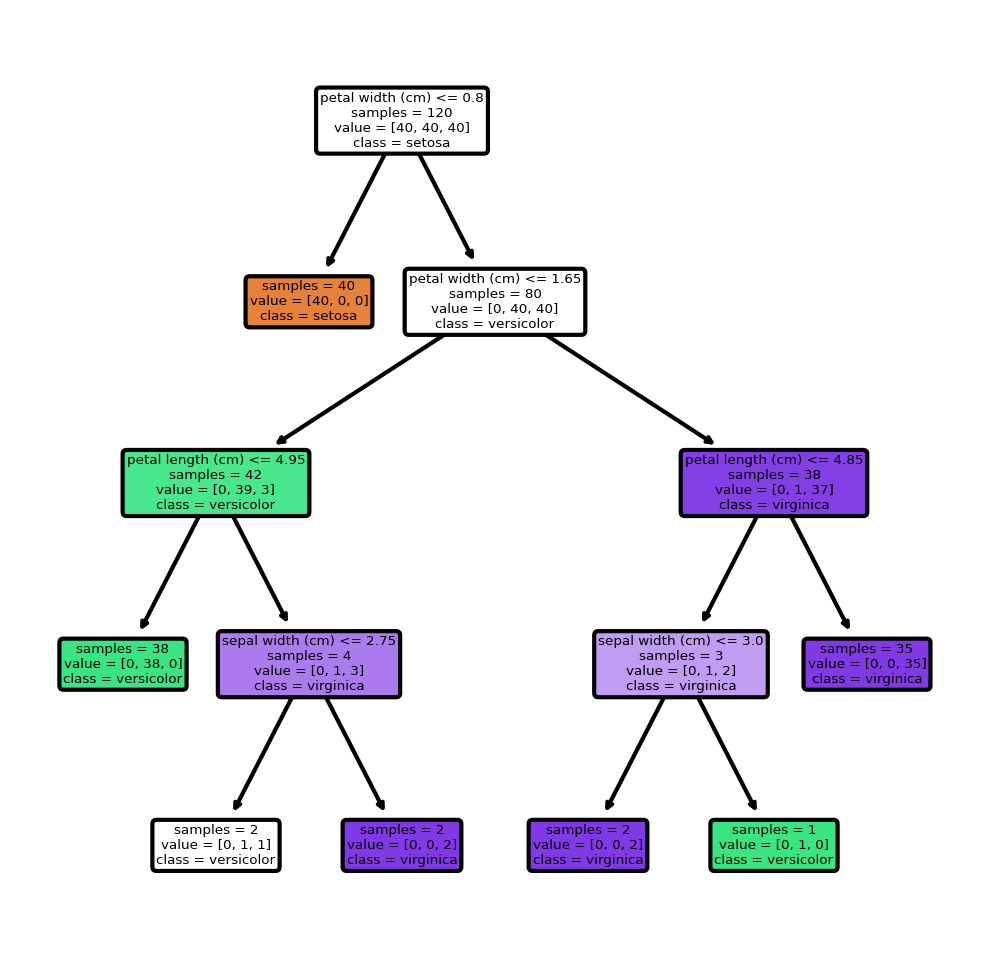

In [9]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

graph=tree.plot_tree(clf,class_names = iris.target_names, feature_names = iris.feature_names,
                     impurity=False, filled=True,rounded=True )

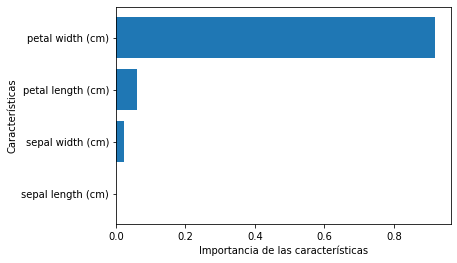

In [10]:
clf.feature_importances_
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

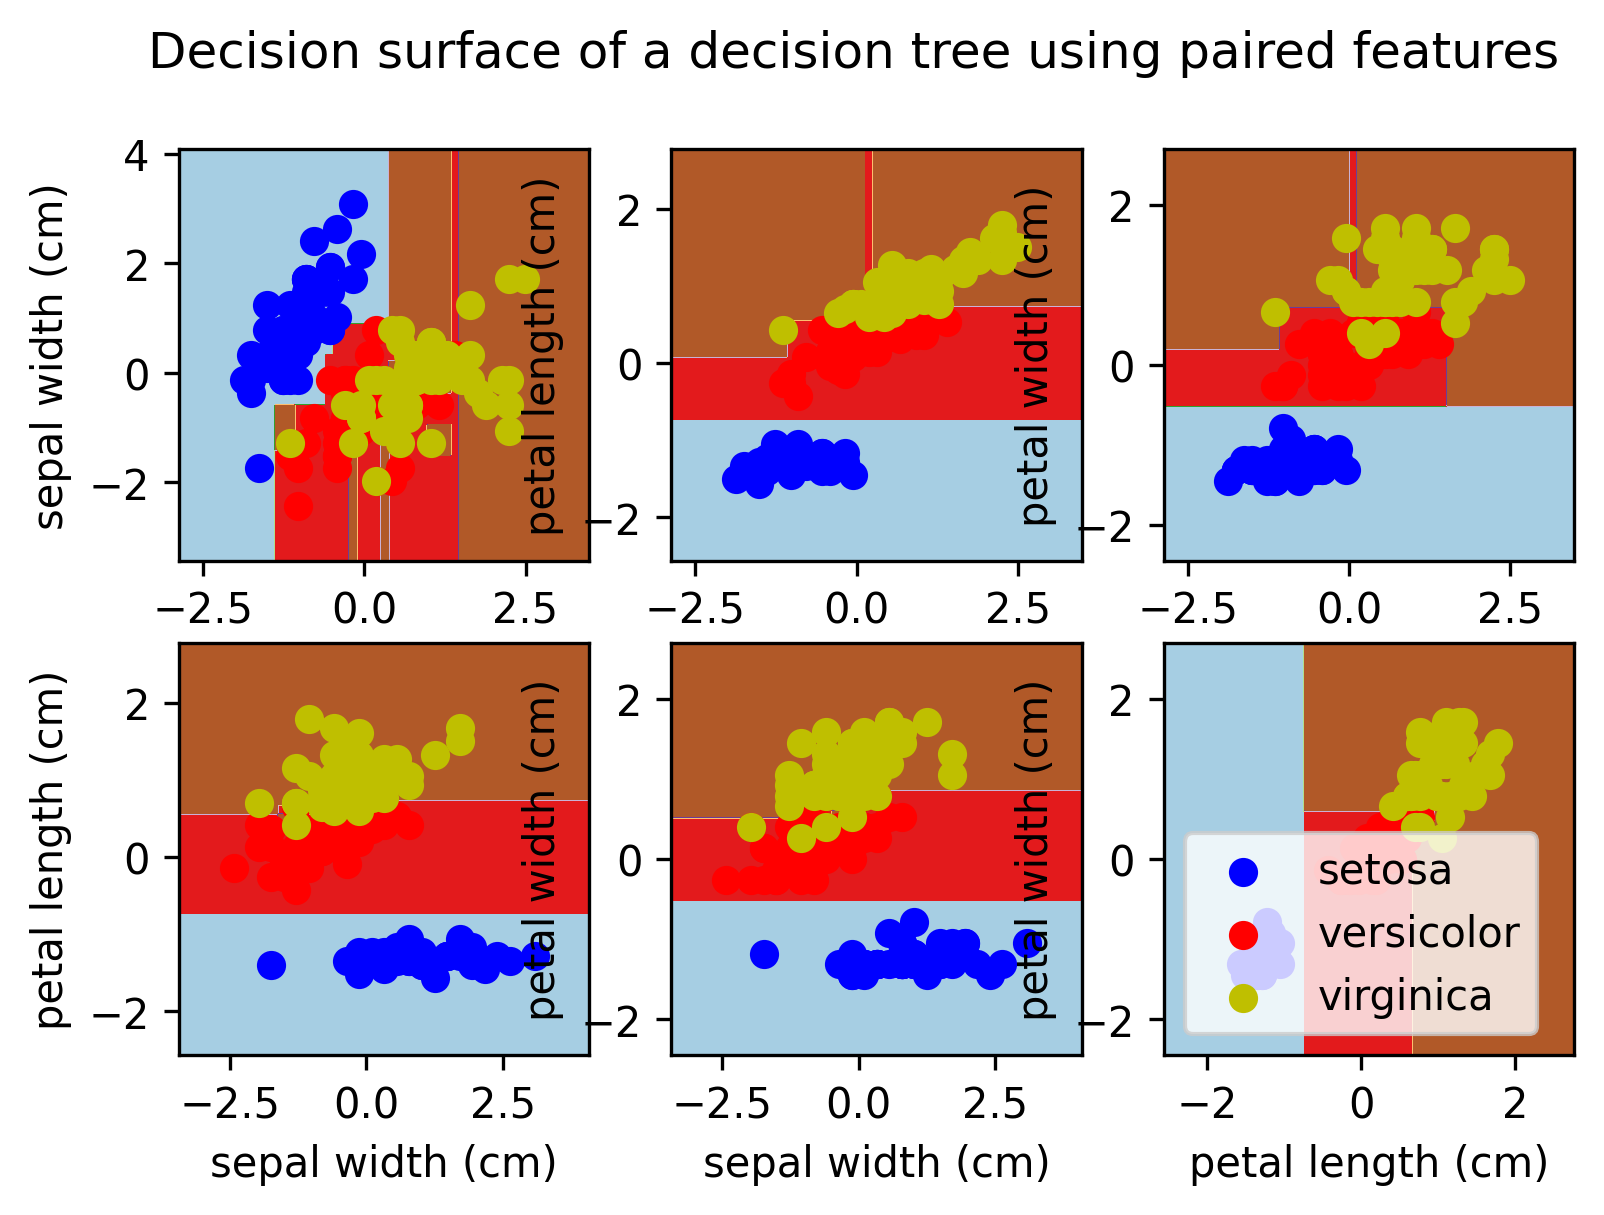

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

fig, axes = plt.subplots(dpi=300)


# Load data
datasets.load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()